<a href="https://colab.research.google.com/github/ManuelAGonzalezC/NLP_trabajo3/blob/main/Identificaci%C3%B3n_de_identidades_con_Deeppavlov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Instalación de liberías vistas en clase**


In [2]:
!pip install tensorflow==1.15.0 # en ambiente python 3.6
!pip install deeppavlov
!pip install spacy<2.2
!python -m deeppavlov install squad_bert
!pip install pandas==1.0.0
!pip install wordcloud
!pip install stop-words

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 412.3 MB 25 kB/s 
     |████████████████████████████████| 3.8 MB 49.1 MB/s 
     |████████████████████████████████| 50 kB 6.9 MB/s 
     |████████████████████████████████| 503 kB 68.8 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=146a29ebf140f8d5daa256955e7b034f0af5e48c625a5307d2e161d807d5782e
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting un

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 878 kB 7.6 MB/s 
     |████████████████████████████████| 859 kB 46.6 MB/s 
     |████████████████████████████████| 65 kB 4.3 MB/s 
     |████████████████████████████████| 2.9 MB 46.2 MB/s 
     |████████████████████████████████| 46 kB 4.0 MB/s 
     |████████████████████████████████| 10.4 MB 20.9 MB/s 
     |████████████████████████████████| 26.1 MB 1.6 MB/s 
     |████████████████████████████████| 8.2 MB 29.7 MB/s 
     |████████████████████████████████| 76 kB 4.6 MB/s 
     |████████████████████████████████| 1.5 MB 59.4 MB/s 
     |████████████████████████████████| 40 kB 25 kB/s 
     |████████████████████████████████| 6.7 MB 44.6 MB/s 
     |████████████████████████████████| 20.1 MB 24.3 MB/s 
     |████████████████████████████████| 7.3 MB 25.4 MB/s 
     |████████████████████████████████| 3.8 MB 48.8 MB/s 
     |████████████████████████████████|

/bin/bash: 2.2: No such file or directory
2022-08-21 17:28:01.500 INFO in 'deeppavlov.core.common.file'['file'] at line 32: Interpreting 'squad_bert' as '/usr/local/lib/python3.7/dist-packages/deeppavlov/configs/squad/squad_bert.json'
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 110.5 MB 1.2 kB/s 
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalled tensorflow-1.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
kapre 0.3.7 requires numpy>=1.18.5, but you have numpy 1.18.0 which is incompatible.
kapre 0.3.7 requires tensorflow>=2.0.0, but you have tensorflow 1.15.5 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheel

**Importación de módulos y librerías**

In [1]:
import spacy
from spacy.lang.es.examples import sentences 
from spacy import displacy
import pandas as pd
import re
#nlp = spacy.load("es_core_news_sm")

**Importación de la data, generación del data frame y transformación de los datos**

Se toma únicamente la columna de "Contenido" y se visualiza.

In [4]:
df4= pd.read_excel("/content/Noticias-Base Completa.xlsx")
noticias= df4['contenido']
noticias = pd.DataFrame(noticias)
noticias

Se genera un split para cada fila, de acuerdo al patrón de hora: "HH:mm a.m/p.m", para quitarle la cola de las noticias a cada una y limpiar la información.

In [9]:
division_hora = noticias['contenido'].str.split('\s(\d{2}\:\d{2}\s?(?:AM|PM|am|pm|a.m|p.m))', expand=True)
division_hora

,0,1,2,3,4,5,6,7,8,9,...,117,118,119,120,121,122,123,124,125,126
0,Las autoridades están buscando al conductor de...,07:50 p.m,. Se han recogido cerca de 132 mil mercados en...,07:36 p.m,. Cuarentena en Medellín: el diario de lo que ...,07:15 p.m,". Falleció el 'Mago Dávila', primer linotipist...",06:43 p.m,. Alias el 'Satánico' busca la libertad por ve...,06:24 p.m,...,None,None,None,None,None,None,None,None,None,None
1,"""Los andenes son para los peatones"", reclama e...",07:50 p.m,. Se han recogido cerca de 132 mil mercados en...,07:36 p.m,. Cuarentena en Medellín: el diario de lo que ...,07:15 p.m,". Falleció el 'Mago Dávila', primer linotipist...",06:43 p.m,. Alias el 'Satánico' busca la libertad por ve...,06:24 p.m,...,None,None,None,None,None,None,None,None,None,None
2,A las 7 de la noche me había quedado de encont...,07:50 p.m,. Se han recogido cerca de 132 mil mercados en...,07:36 p.m,. Cuarentena en Medellín: el diario de lo que ...,07:15 p.m,". Falleció el 'Mago Dávila', primer linotipist...",06:43 p.m,. Alias el 'Satánico' busca la libertad por ve...,06:24 p.m,...,None,None,None,None,None,None,None,None,None,None
3,Atravesados. Eso es lo que se les pasa por la ...,07:50 p.m,. Se han recogido cerca de 132 mil mercados en...,07:36 p.m,. Cuarentena en Medellín: el diario de lo que ...,07:15 p.m,". Falleció el 'Mago Dávila', primer linotipist...",06:43 p.m,. Alias el 'Satánico' busca la libertad por ve...,06:24 p.m,...,None,None,None,None,None,None,None,None,None,None
4,“Estamos proponiendo la figura de un contrato ...,07:50 p.m,. Se han recogido cerca de 132 mil mercados en...,07:36 p.m,. Cuarentena en Medellín: el diario de lo que ...,07:15 p.m,". Falleció el 'Mago Dávila', primer linotipist...",06:43 p.m,. Alias el 'Satánico' busca la libertad por ve...,06:24 p.m,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14391,En Twitter es tendencia 'FCAS' por una denunci...,11:19 p.m,. Ejercite su mente en la cuarentena con este ...,10:00 p.m,. Ya se venden medicamentos de cannabis con fó...,10:00 p.m,. El guía de la salud mental del pueblo con má...,09:31 p.m,. Una cabina de desinfección manual para Barra...,07:50 p.m,...,None,None,None,None,None,None,None,None,None,None
14392,La naviera internacional Royal Caribbean prese...,11:19 p.m,. Ejercite su mente en la cuarentena con este ...,10:00 p.m,. Ya se venden medicamentos de cannabis con fó...,10:00 p.m,. El guía de la salud mental del pueblo con má...,09:31 p.m,. Una cabina de desinfección manual para Barra...,07:50 p.m,...,None,None,None,None,None,None,None,None,None,None
14393,¿Necesita razones para ir a Barú? A menos de u...,11:19 p.m,. Ejercite su mente en la cuarentena con este ...,10:00 p.m,. Ya se venden medicamentos de cannabis con fó...,10:00 p.m,. El guía de la salud mental del pueblo con má...,09:31 p.m,. Una cabina de desinfección manual para Barra...,07:50 p.m,...,None,None,None,None,None,None,None,None,None,None
14394,Se estima que la población LGTBI en Colombia e...,11:19 p.m,. Ejercite su mente en la cuarentena con este ...,10:00 p.m,. Ya se venden medicamentos de cannabis con fó...,10:00 p.m,. El guía de la salud mental del pueblo con má...,09:31 p.m,. Una cabina de desinfección manual para Barra...,07:50 p.m,...,None,None,None,None,None,None,None,None,None,None


se toma únicamente la primera columna generada, que es donde se encuentra la noticia completa y se genera de nuevo un dataframe con la información.

Se seleccionan las primeras 60 filas.

In [10]:
noticia2  = division_hora[0]
noticia2 = pd.DataFrame(noticia2)
noticia2.head(60)

,0
0,Las autoridades están buscando al conductor de...
1,"""Los andenes son para los peatones"", reclama e..."
2,A las 7 de la noche me había quedado de encont...
3,Atravesados. Eso es lo que se les pasa por la ...
4,“Estamos proponiendo la figura de un contrato ...
5,Valle del Cauca
6,Valle del Cauca
7,Los agresores sexuales serán perseguidos por u...
8,Cien viviendas de emergencia (se construyen en...
9,"La idea no solo es llegar a más departamentos,..."


Se borran las filas que están vacías

In [14]:
noticia2 = noticia2.rename(columns={0:'contenido'})
noticia3 = noticia2[noticia2['contenido'].notna()]
noticia4 = noticia3.head(60)
noticia4

,contenido
0,Las autoridades están buscando al conductor de...
1,"""Los andenes son para los peatones"", reclama e..."
2,A las 7 de la noche me había quedado de encont...
3,Atravesados. Eso es lo que se les pasa por la ...
4,“Estamos proponiendo la figura de un contrato ...
5,Valle del Cauca
6,Valle del Cauca
7,Los agresores sexuales serán perseguidos por u...
8,Cien viviendas de emergencia (se construyen en...
9,"La idea no solo es llegar a más departamentos,..."


Se importan los módulos y librerías para la construcción del modelo de identificación de entidades.

In [15]:
from deeppavlov import configs, build_model
import warnings
warnings.filterwarnings('ignore')
ner_model = build_model(configs.ner.ner_ontonotes_bert_mult, download=True)

2022-08-21 23:15:59.386 INFO in 'deeppavlov.download'['download'] at line 138: Skipped http://files.deeppavlov.ai/deeppavlov_data/bert/multi_cased_L-12_H-768_A-12.zip download because of matching hashes
INFO:deeppavlov.download:Skipped http://files.deeppavlov.ai/deeppavlov_data/bert/multi_cased_L-12_H-768_A-12.zip download because of matching hashes
2022-08-21 23:16:06.32 INFO in 'deeppavlov.download'['download'] at line 138: Skipped http://files.deeppavlov.ai/deeppavlov_data/ner_ontonotes_bert_mult_v1.tar.gz download because of matching hashes
INFO:deeppavlov.download:Skipped http://files.deeppavlov.ai/deeppavlov_data/ner_ontonotes_bert_mult_v1.tar.gz download because of matching hashes
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package perluniprops to /root/nltk_data...
[nltk_

Se crean funciones para el tratamiento del texto y listado de las entidades generadas, identifcando su posición y posteriormente haciendo un conteo de cada una de ellas.

In [16]:
def facilent(Ent):
    tokens, tags = Ent
    text=[]
    types=[]
    start=[]
    end=[]
    svalue=0
    csvalue=0
    cevalue=0
    for p in range(len(tags[0])):
        cevalue=csvalue+len(tokens[0][p])
        
        if tags[0][p][0]=='B':
            svalue=p 
            start.append(csvalue)
            types.append("".join(Entidad[p][2:]))
            if tags[0][p+1][0]=='B':
                end.append(cevalue)
                text.append(" ".join(tokens[0][svalue:p+1]))
            elif tags[0][p+1][0]=='O':
                end.append(cevalue)
                text.append(" ".join(tokens[0][svalue:p+1]))

        elif tags[0][p][0]=='I':
            if tags[0][p+1][0]=='I':
                None
            else:
                end.append(cevalue)
                text.append(" ".join(tokens[0][svalue:p+1]))
        csvalue=cevalue+1
    
    Ents=[]
    for i in range(len(types)):
        Ents.append({"text":text[i],"type":types[i],"start_chart":start[i],"end_chart":end[i]})
    return Ents
def displayent(TextoNer,Entidad):
    TextoNer=TextoNer+['pala']
    Entidad = Entidad+['O']
    text=[]
    types=[]
    start=[]
    end=[]
    svalue=0
    csvalue=0
    cevalue=0
    for p in range(len(Entidad)-1):
        cevalue=csvalue+len(TextoNer[p])
        
        if Entidad[p][0]=='B':
            svalue=p 
            start.append(csvalue)
            types.append("".join(Entidad[p][2:]))
            if Entidad[p+1][0]=='B':
                end.append(cevalue)
                text.append(" ".join(TextoNer[svalue:p+1]))
            elif Entidad[p+1][0]=='O':
                end.append(cevalue)
                text.append(" ".join(TextoNer[svalue:p+1]))

        elif Entidad[p][0]=='I':
            if Entidad[p+1][0]=='I':
                None
            else:
                end.append(cevalue)
                text.append(" ".join(TextoNer[svalue:p+1]))
        csvalue=cevalue+1
    
    ents=[]
    for i in range(len(types)):
        ents.append({"label":types[i],"start":start[i],"end":end[i]})
    Ents=[{"text":" ".join(TextoNer),"ents":ents,"tilte":None}]
    return Ents


In [17]:
def aplicar_modelo(TextoNER):

  #TextoNER=noticia2[0]
  n=round(len(TextoNER.split())//200)+1
  Corp_spl=[' '.join(TextoNER.split()[i*200:i*200+200]) for i in range(n)]
  TextoNER_1=[]
  Entidad=[]
  for i in Corp_spl:
    TextoNER_1+=ner_model([i])[0][0]
    Entidad+=ner_model([i])[1][0]
  model_data =displayent(TextoNER_1,Entidad)[0]
  word_list = []
  for i in model_data["ents"]:
    text_word=model_data['text'][i['start']:i['end']]
    type_word=i['label']
    word_list.append((text_word,type_word))
    #word_list.append(TextoNer[model_data["start"]:["end"]])
  return word_list




Al dataframe de noticias se le pega la columna con las entidades encontradas para cada noticia.

In [19]:
noticia4['entidades'] = noticia4['contenido'].apply(lambda x: aplicar_modelo(x))
noticia4

,contenido,entidades
0,Las autoridades están buscando al conductor de...,"[(Carlos Alberto Carmona, PERSON), (Segrup, OR..."
1,"""Los andenes son para los peatones"", reclama e...","[(Carmenza Durán, PERSON), (la calle 140, FAC)..."
2,A las 7 de la noche me había quedado de encont...,"[(las 7 de la noche, TIME), (Boris, PERSON), (..."
3,Atravesados. Eso es lo que se les pasa por la ...,"[(El Retiro, FAC), (El Chicó, FAC), (Rosales, ..."
4,“Estamos proponiendo la figura de un contrato ...,"[(la Corte Constitucional, ORG), (El pasado ma..."
5,Valle del Cauca,"[(Valle del Cauca, GPE)]"
6,Valle del Cauca,"[(Valle del Cauca, GPE)]"
7,Los agresores sexuales serán perseguidos por u...,[(del Departamento de Justicia de los Estados ...
8,Cien viviendas de emergencia (se construyen en...,"[(Cien, CARDINAL), (dos días, DATE), (8 años, ..."
9,"La idea no solo es llegar a más departamentos,...","[(colombianos, NORP), (la noche a la mañana, T..."


Se crea una nueva lista de recuento de todas las entidades encontradas, organizándolas de mayor a menor.

In [21]:
from collections import Counter
values_NER = noticia4['entidades'].cumsum()
listado = values_NER[60]
contador_NER = Counter(listado)
#print(len(listado))
print(contador_NER.most_common())

[(('Valle del Cauca', 'GPE'), 26), (('Congreso', 'ORG'), 18), (('Colombia', 'GPE'), 15), (('Bogotá', 'GPE'), 15), (('dos', 'CARDINAL'), 12), (('Corte', 'ORG'), 10), (('Valle del Cauca', 'LOC'), 10), (('Uribe', 'PERSON'), 8), (('la Corte Constitucional', 'ORG'), 7), (('México', 'GPE'), 7), (('colombiano', 'NORP'), 6), (('Antioquia', 'GPE'), 6), (('Procuraduría', 'ORG'), 6), (('París', 'GPE'), 6), (('China', 'GPE'), 6), (('Fiscalía', 'ORG'), 5), (('Juan Manuel Santos', 'PERSON'), 5), (('EPS', 'ORG'), 5), (('tres', 'CARDINAL'), 5), (('1', 'CARDINAL'), 5), (('Gil', 'PERSON'), 5), (('primer', 'ORDINAL'), 5), (('5', 'CARDINAL'), 5), (('3', 'CARDINAL'), 5), (('12', 'CARDINAL'), 4), (('cuatro', 'CARDINAL'), 4), (('Policía', 'ORG'), 4), (('Constitución', 'LAW'), 4), (('JUSTICIA Valle del Cauca', 'GPE'), 4), (('colombianos', 'NORP'), 4), (('Estados Unidos', 'GPE'), 4), (('España', 'GPE'), 4), (('Soacha', 'GPE'), 4), (('Dian', 'ORG'), 4), (('Santos', 'PERSON'), 4), (('2010', 'DATE'), 4), (('Fajar

In [22]:
print(type(contador_NER.most_common()))

<class 'list'>


In [24]:
lista_fecuencia = contador_NER.most_common()
lista_fecuencia

[(('Valle del Cauca', 'GPE'), 26),
 (('Congreso', 'ORG'), 18),
 (('Colombia', 'GPE'), 15),
 (('Bogotá', 'GPE'), 15),
 (('dos', 'CARDINAL'), 12),
 (('Corte', 'ORG'), 10),
 (('Valle del Cauca', 'LOC'), 10),
 (('Uribe', 'PERSON'), 8),
 (('la Corte Constitucional', 'ORG'), 7),
 (('México', 'GPE'), 7),
 (('colombiano', 'NORP'), 6),
 (('Antioquia', 'GPE'), 6),
 (('Procuraduría', 'ORG'), 6),
 (('París', 'GPE'), 6),
 (('China', 'GPE'), 6),
 (('Fiscalía', 'ORG'), 5),
 (('Juan Manuel Santos', 'PERSON'), 5),
 (('EPS', 'ORG'), 5),
 (('tres', 'CARDINAL'), 5),
 (('1', 'CARDINAL'), 5),
 (('Gil', 'PERSON'), 5),
 (('primer', 'ORDINAL'), 5),
 (('5', 'CARDINAL'), 5),
 (('3', 'CARDINAL'), 5),
 (('12', 'CARDINAL'), 4),
 (('cuatro', 'CARDINAL'), 4),
 (('Policía', 'ORG'), 4),
 (('Constitución', 'LAW'), 4),
 (('JUSTICIA Valle del Cauca', 'GPE'), 4),
 (('colombianos', 'NORP'), 4),
 (('Estados Unidos', 'GPE'), 4),
 (('España', 'GPE'), 4),
 (('Soacha', 'GPE'), 4),
 (('Dian', 'ORG'), 4),
 (('Santos', 'PERSON'), 4

Se crea un data frame con las entidades encontradas y el número de veces que se repite

In [27]:
df = pd.DataFrame(contador_NER.most_common())
df = df.rename(columns={0:'entidades', 1:'cuenta'})
df

,entidades,cuenta
0,"(Valle del Cauca, GPE)",26
1,"(Congreso, ORG)",18
2,"(Colombia, GPE)",15
3,"(Bogotá, GPE)",15
4,"(dos, CARDINAL)",12
...,...,...
900,"(Izquierda Unida, ORG)",1
901,"(316, CARDINAL)",1
902,"(Esta semana, DATE)",1
903,"(Europa, LOC)",1


Seseprar la tupla de labels y entidades del data frame para posteriormente utilizarlo en la nube de palabras.

In [29]:
df1 =df['entidades'].apply(pd.Series)
df1 = df1.rename(columns={0:'label', 1:'entidad'})
df1

,label,entidad
0,Valle del Cauca,GPE
1,Congreso,ORG
2,Colombia,GPE
3,Bogotá,GPE
4,dos,CARDINAL
...,...,...
900,Izquierda Unida,ORG
901,316,CARDINAL
902,Esta semana,DATE
903,Europa,LOC


In [31]:
df2 = df['cuenta']
df2 = pd.DataFrame(df2)
df2

,cuenta
0,26
1,18
2,15
3,15
4,12
...,...
900,1
901,1
902,1
903,1


In [32]:
df3 = pd.merge(df1, df2, how='left', on=None, left_on=None, right_on=None,
         left_index=True, right_index=True, sort=True)
df3

,label,entidad,cuenta
0,Valle del Cauca,GPE,26
1,Congreso,ORG,18
2,Colombia,GPE,15
3,Bogotá,GPE,15
4,dos,CARDINAL,12
...,...,...,...
900,Izquierda Unida,ORG,1
901,316,CARDINAL,1
902,Esta semana,DATE,1
903,Europa,LOC,1


**Creación de Nube de palabras**

Se importan los módulos para generar la nube de palabras de las entidades encontradas en las noticias

In [49]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from stop_words import get_stop_words
import matplotlib.pyplot as plt
%matplotlib inline

Se crean dos tipos de nubes de palabras:
1. Sin stop words:

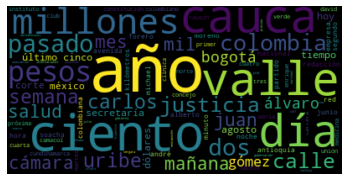

In [51]:
text1 = " ".join(label for label in df3.label)
stop_words=get_stop_words("es")
text = df3.label.tolist() 
text = ' '.join(text).lower()
wordcloud = WordCloud(stopwords = stop_words,
                      collocations=True).generate(text)

plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()

2. Con stop words:

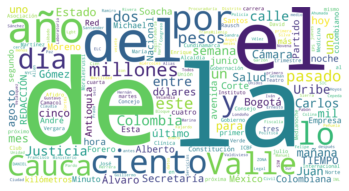

In [55]:
word_cloud1 = WordCloud(collocations = False, background_color = 'white',
                        width = 4092, height = 2160).generate(text1)
plt.imshow(word_cloud1, interpolation='bilinear')
plt.axis("off")
plt.show()

Se puede identificar más facilemten en la nube de palabras sin stop words, que las palabras más grandescoinciden con el listado de las entidades que más se repiten en el listado de las noticias.

Se utlizaron el 100% de las entidades encontradas en las primeras 60 noticias seleccionadas.